In [57]:
# Nama : Mia Amaliah
# NIM  : 1202922002
#Tugas : Multi Linear Regression Big Data Analytic




import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [58]:
# pd.read_csv = import data file nya dari dataset
#df.head (10) = jika ingin menampilkan 10 data teratas dari data frame


ht = pd.read_csv ("../input/heart-disease-uci/heart.csv")
ht.head (10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [59]:
#menampilkan 10 data terbawah
ht.tail (10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [60]:
#menampilkan pasien dengan data usia di atas 20 dan max 60 thn

ht2=ht[(ht['age']>20) & (ht['age']<60)]
ht2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
#menghapus attribut yang tidak di gunakan dalam variable

x=ht2.drop(['target'],axis=1).values
y=ht2['target'].values
print (x)

[[37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 [56.  1.  1. ...  2.  0.  2.]
 ...
 [45.  1.  3. ...  1.  0.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [62]:
print (y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [63]:
# x = men-seleksi data yang akan di tampilkan dari semua row (':') yang akan di masukan ke paramter X 
# y = menseleksi data hanya akan menampilkan data Y pada attribute
# x = menampilkan data x
# keyword iloc = untuk menseleksi data

x= ht2.iloc[:,1:13].values    
y= ht2.iloc[:, 0].values      
print (x)


[[  1.   2. 130. ...   0.   0.   2.]
 [  0.   1. 130. ...   2.   0.   2.]
 [  1.   1. 120. ...   2.   0.   2.]
 ...
 [  1.   3. 110. ...   1.   0.   3.]
 [  1.   0. 130. ...   1.   1.   3.]
 [  0.   1. 130. ...   1.   1.   2.]]


In [64]:
print(y);

[37 41 56 57 57 56 44 52 57 54 48 49 58 50 58 43 59 44 42 40 59 51 53 41
 44 54 51 46 54 54 51 48 45 53 39 52 44 47 53 53 51 44 52 48 45 34 57 54
 52 41 58 35 51 45 44 54 51 29 51 43 55 51 59 52 58 41 45 52 42 46 54 58
 48 57 52 54 45 53 52 43 53 42 59 42 50 45 50 50 57 43 55 37 41 56 46 46
 59 41 54 39 34 47 52 54 49 42 41 41 49 57 51 43 42 44 44 42 39 58 47 35
 58 56 56 55 41 38 38 53 56 48 58 58 40 43 57 55 58 50 44 54 50 41 51 58
 54 59 46 44 58 52 59 49 59 57 39 56 43 48 55 56 54 35 59 47 57 55 51 58
 35 59 57 56 48 56 54 51 43 59 45 58 50 38 52 53 54 55 49 54 56 46 58 47
 52 58 57 58 42 52 59 40 46 59 57 57 55 58 58 44 59 57 45 57 57]


In [65]:
#x = data
#y = target

#from sklearn.model_selection import train_test_split
#membagi data dengan presentasi 70:30 untuk data testing yang akan dilakukan

x_train, x_test, y_train, y_test = train_test_split (x,y, test_size =0.2,random_state=0)
x_train


array([[  1.,   0., 135., ...,   1.,   0.,   3.],
       [  1.,   0., 132., ...,   1.,   1.,   3.],
       [  1.,   1., 120., ...,   0.,   0.,   2.],
       ...,
       [  0.,   0., 130., ...,   1.,   0.,   2.],
       [  1.,   1., 108., ...,   2.,   0.,   3.],
       [  1.,   0., 124., ...,   1.,   0.,   3.]])

In [66]:
y_train

array([59, 55, 56, 53, 53, 34, 45, 57, 49, 44, 45, 44, 51, 45, 51, 51, 39,
       43, 57, 51, 48, 50, 43, 55, 44, 51, 55, 51, 57, 41, 40, 54, 49, 44,
       56, 35, 51, 46, 49, 41, 55, 59, 47, 41, 58, 46, 39, 57, 59, 57, 59,
       59, 50, 55, 59, 56, 43, 58, 59, 48, 48, 47, 57, 55, 58, 46, 56, 54,
       57, 56, 57, 47, 57, 58, 44, 37, 46, 38, 46, 58, 52, 44, 46, 41, 52,
       45, 45, 41, 52, 34, 58, 57, 57, 44, 42, 50, 56, 59, 38, 43, 35, 37,
       52, 49, 35, 52, 52, 29, 41, 41, 58, 57, 52, 42, 40, 54, 44, 53, 43,
       45, 57, 56, 39, 54, 44, 47, 49, 48, 57, 53, 54, 45, 58, 51, 45, 44,
       54, 59, 39, 59, 51, 43, 42, 58, 58, 48, 53, 54, 55, 42, 46, 54, 57,
       53, 58, 51, 50, 57, 54, 50, 44, 51, 54, 54, 58, 52, 52, 58, 54, 48])

In [67]:
#model resgresion yang akan set

ml=LinearRegression()
ml.fit(x_train,y_train)


LinearRegression()

In [68]:
y_pred = ml.predict(x_test)
print (y_pred)


[54.63794062 50.57188013 46.70683623 49.08233279 48.18947251 51.6789928
 48.40689827 54.56780679 51.48351481 48.79177809 50.1501286  52.59309089
 61.92774288 46.0235636  49.21817661 48.54062225 47.69904896 53.58904982
 48.03977497 52.72989639 55.78457307 49.35788312 51.26416932 58.90657451
 50.60324912 48.45270302 52.83895582 50.26553973 47.11665706 49.64575305
 55.57406817 48.9744588  45.68950312 44.46574387 46.18930814 49.80884857
 51.19116782 50.1124431  50.50440966 46.7486991  47.96314294 51.3529334
 53.46009147]


In [69]:
ml.predict ([[1,2,130,250,0,1,187,0,3.5,0,0,2]])

array([46.92692469])

In [70]:
r2_score(y_test,y_pred)

0.03571438617429745

Text(0.5, 1.0, 'Actual vs Predicted')

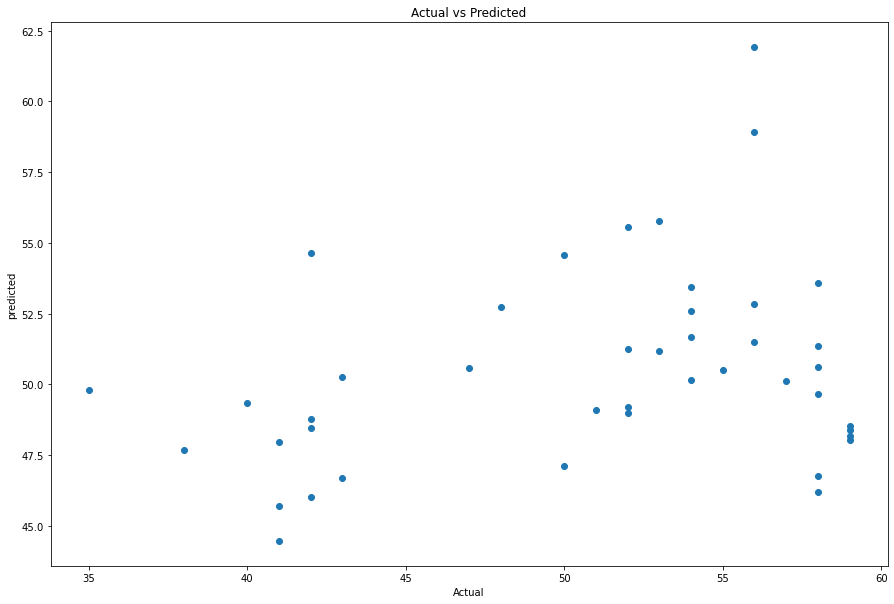

In [71]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title ('Actual vs Predicted')

In [72]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:30]

,Actual Value,Predicted value,Difference
0,42,54.637941,-12.637941
1,47,50.571880,-3.571880
2,43,46.706836,-3.706836
3,51,49.082333,1.917667
4,59,48.189473,10.810527
5,54,51.678993,2.321007
6,59,48.406898,10.593102
7,50,54.567807,-4.567807
8,56,51.483515,4.516485
9,42,48.791778,-6.791778
